# CH20. 딥러닝 튜닝

### 하이퍼파라미터

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

#-- Load dataset ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#-- Network Modeling ---
model = Sequential()
model.add(Dense(256, input_dim=784))
# 하이퍼파라미터 : 활성화 함수
model.add(Activation("sigmoid"))
# 하이퍼파라미터 : 은닉층의 수, 은닉층의 채널 수
model.add(Dense(128))
model.add(Activation("sigmoid"))
# 하이퍼파라미터 : 드롭아웃 비율(rate)
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

# 하이퍼파라미터 : 학습 비율(Ir)
sgd = optimizers.SGD(lr=0.01)

# 하이퍼파라미터 : 최적화 함수(optimizer)
# 하이퍼파라미터 : 오차 함수(loss)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# 하이퍼파라미터 : 배치 처리 크기(batch_size)
# 하이퍼파라미터 : epoch 수 (epochs)
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Using TensorFlow backend.
/home/max/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/max/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/max/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/max/anaconda3/lib/python3.6/site-packages/tensorflow/python





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
6000/6000 [==============================] - 1s 135us/step - loss: 2.2703 - acc: 0.1917
Epoch 2/10
6000/6000 [==============================] - 0s 80us/step - loss: 1.8606 - acc: 0.3765
Epoch 3/10
6000/6000 [==============================] - 1s 86us/step - loss: 1.5963 - acc: 0.5138
Epoch 4/10
6000/6000 [==============================] - 0s 71us/step - loss: 1.3690 - acc: 0.5993
Epoch 5/10
6000/6000 [==============================] - 1s 84us/step - loss: 1.1955 - acc: 0.6650
Epoch 6/10
6000/6000 [==============================] - 0s 77us/step - loss: 1.0628 - acc: 0.7113
Epoch 7/10
6000/6000 [==============================] - 1s 89us/step - loss: 0.9598 - acc: 0.7380
Epoch 8/10
6000/6000 [==============================] - 0s 73us/step - loss: 0.8751 - acc: 0.7712


###  네트워크 구조

In [14]:
#
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

#-- Load DATASET
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#-- Network model
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

def funcA():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcB():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcC():
    model.add(Dense(1568))
    model.add(Activation("sigmoid"))

# ---------------------------
#funcA()  #-- loss:0.714,  acc:0.786
#funcB()  #-- loss: 2.29,  acc:0.179
funcC()   #-- loss: 0.834, acc:0.716
# ---------------------------

model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 1s 207us/step - loss: 5.6212 - acc: 0.2843
Epoch 2/3
6000/6000 [==============================] - 1s 131us/step - loss: 1.1053 - acc: 0.6175
Epoch 3/3
6000/6000 [==============================] - 1s 130us/step - loss: 0.8485 - acc: 0.7100
evaluate loss: 0.8348555202484131
evaluate acc: 0.716


### 드롭아웃

Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 1s 172us/step - loss: 1.7610 - acc: 0.4082 - val_loss: 1.1381 - val_acc: 0.6940
Epoch 2/5
6000/6000 [==============================] - 1s 89us/step - loss: 1.0353 - acc: 0.6733 - val_loss: 0.7842 - val_acc: 0.7940
Epoch 3/5
6000/6000 [==============================] - 0s 81us/step - loss: 0.8438 - acc: 0.7367 - val_loss: 0.7134 - val_acc: 0.8070
Epoch 4/5
6000/6000 [==============================] - 0s 81us/step - loss: 0.7794 - acc: 0.7605 - val_loss: 0.7342 - val_acc: 0.7780
Epoch 5/5
6000/6000 [==============================] - 1s 91us/step - loss: 0.7467 - acc: 0.7580 - val_loss: 0.6463 - val_acc: 0.8060


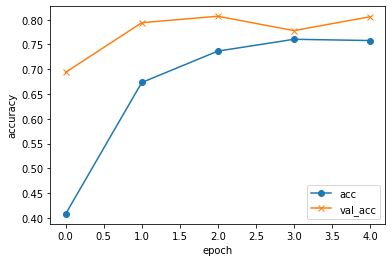

In [15]:
#
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

#-- Load DATASET
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#-- Network Model
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))

# Dropout --------------------
model.add(Dropout(rate=0.5))
# ---------------------------

model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

# acc, val_acc의 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

### 학습률

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))


def funcA():
    global lr
    lr = 0.01

def funcB():
    global lr
    lr = 0.1

def funcC():
    global lr
    lr = 1.0

# 학습 속도 결정
#---------------------------
#funcA()
#funcB()
funcC()
#---------------------------

sgd = optimizers.SGD(lr=lr)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 1s 173us/step - loss: 2.1933 - acc: 0.2055
Epoch 2/3
6000/6000 [==============================] - 0s 71us/step - loss: 2.0098 - acc: 0.2663
Epoch 3/3
6000/6000 [==============================] - 0s 70us/step - loss: 1.9280 - acc: 0.2985
evaluate loss: 1.8305221214294434
evaluate acc: 0.253


### 미니배치 학습

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global batch_size
    batch_size = 16

def funcB():
    global batch_size
    batch_size = 32

def funcC():
    global batch_size
    batch_size = 64

# batch_size
# ---------------------------
# funcA() : 16
# funcB() : 32
funcC() : 64
# ---------------------------

model.fit(X_train, y_train, batch_size=batch_size, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 1s 141us/step - loss: 1.8545 - acc: 0.3678
Epoch 2/3
6000/6000 [==============================] - 0s 43us/step - loss: 1.1521 - acc: 0.6502
Epoch 3/3
6000/6000 [==============================] - 0s 42us/step - loss: 0.8766 - acc: 0.7478
evaluate loss: 0.7239608049392701
evaluate acc: 0.809


### 반복 학습

Train on 1500 samples, validate on 6000 samples
Epoch 1/60
1500/1500 [==============================] - 1s 621us/step - loss: 1.9949 - acc: 0.3580 - val_loss: 1.7023 - val_acc: 0.5700
Epoch 2/60
1500/1500 [==============================] - 0s 189us/step - loss: 1.4273 - acc: 0.6573 - val_loss: 1.3275 - val_acc: 0.6065
Epoch 3/60
1500/1500 [==============================] - 0s 191us/step - loss: 1.0644 - acc: 0.7700 - val_loss: 1.1095 - val_acc: 0.6938
Epoch 4/60
1500/1500 [==============================] - 0s 182us/step - loss: 0.9280 - acc: 0.8080 - val_loss: 0.9601 - val_acc: 0.7475
Epoch 5/60
1500/1500 [==============================] - 0s 181us/step - loss: 0.7841 - acc: 0.8240 - val_loss: 0.8580 - val_acc: 0.7513
Epoch 6/60
1500/1500 [==============================] - 0s 185us/step - loss: 0.7034 - acc: 0.8513 - val_loss: 0.7815 - val_acc: 0.7812
Epoch 7/60
1500/1500 [==============================] - 0s 195us/step - loss: 0.6482 - acc: 0.8573 - val_loss: 0.7750 - val_acc: 0.7603


1500/1500 [==============================] - 0s 187us/step - loss: 0.7786 - acc: 0.7507 - val_loss: 1.1040 - val_acc: 0.5785


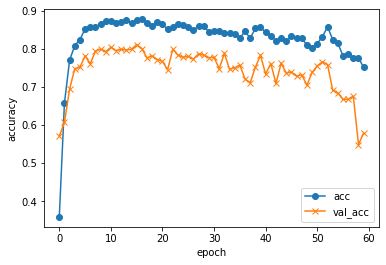

evaluate loss: 1.1039677867889404
evaluate acc: 0.5785


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:1500]
X_test = X_test.reshape(X_test.shape[0], 784)[:6000]
y_train = to_categorical(y_train)[:1500]
y_test = to_categorical(y_test)[:6000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
#여기 Dropout을 사용하지 않습니다
#model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global epochs
    epochs = 5

def funcB():
    global epochs
    epochs = 10

def funcC():
    global epochs
    epochs = 60


# ---------------------------
# epochs: 5
#funcA()
# epochs: 10
#funcB()   #acc:0.7995
# epochs: 60
funcC()
# ---------------------------

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

#acc, val_acc
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

### 연습 문제

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=96, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))
#---------------------------

Epoch 1/5
6000/6000 [==============================] - 1s 130us/step - loss: 2.0235 - acc: 0.3027
Epoch 2/5
6000/6000 [==============================] - 0s 31us/step - loss: 1.3610 - acc: 0.5853
Epoch 3/5
6000/6000 [==============================] - 0s 32us/step - loss: 0.9960 - acc: 0.7093
Epoch 4/5
6000/6000 [==============================] - 0s 32us/step - loss: 0.8115 - acc: 0.7707
Epoch 5/5
6000/6000 [==============================] - 0s 32us/step - loss: 0.7077 - acc: 0.8003
evaluate loss: 0.5877091541290284
evaluate acc: 0.865
